In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df

,Name,Sex,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,...,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,Tested,Date
0,Abbie Murphy,F,Wraps,29.0,24-34,59.8,63,80.0,92.5,105.0,...,130.0,0.0,130.0,290.0,4,324.16,324.16,286.42,NaN,2019-04-06
1,Abbie Tuong,F,Wraps,29.0,24-34,58.5,63,100.0,110.0,120.0,...,145.0,0.0,145.0,332.5,2,378.07,378.07,334.16,NaN,2019-04-06
2,Ainslee Hooper,F,Raw,40.0,40-44,55.4,57,0.0,0.0,0.0,...,0.0,0.0,0.0,32.5,1,38.56,38.56,34.12,NaN,2019-04-06
3,Amy Moldenhauer,F,Wraps,23.0,20-23,60.0,63,0.0,0.0,105.0,...,0.0,0.0,132.5,310.0,3,345.61,345.61,305.37,NaN,2019-04-06
4,Andrea Rowan,F,Wraps,45.0,45-49,104.0,84+,120.0,130.0,140.0,...,170.0,0.0,170.0,390.0,3,321.25,338.91,274.56,NaN,2019-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647654,Marian Cafalik,M,Raw,60.5,60-64,73.5,74,160.0,170.0,175.0,...,0.0,0.0,190.0,452.5,4,327.07,438.27,316.52,Yes,2011-10-15
647655,Marian Piwowarczyk,M,Raw,55.5,55-59,63.5,66,90.0,100.0,110.0,...,170.0,0.0,170.0,375.0,5,304.16,372.60,295.66,Yes,2011-10-15
647656,Andrzej Bryniarski,M,Raw,62.5,60-64,94.4,105,140.0,150.0,160.0,...,180.0,0.0,180.0,440.0,6,274.48,382.36,264.22,Yes,2011-10-15
647657,Stanisław Goroczko,M,Raw,63.5,60-64,80.8,83,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,DQ,NaN,NaN,NaN,Yes,2011-10-15


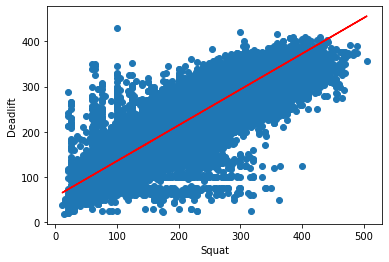

In [65]:
# MATPLOTLIB TESTING

# Transitioning newDf to subset numpy arrays

base = df[(df['Best3SquatKg']>0)&(df['Best3DeadliftKg']>0)].dropna()
squat = base['Best3SquatKg']
dead = base['Best3DeadliftKg']

x = squat.to_numpy()
y = dead.to_numpy()

# Plotting and labelling axes

plt.plot(x,y,'o')
plt.xlabel('Squat')
plt.ylabel('Deadlift')

# Creating trendline

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'red')

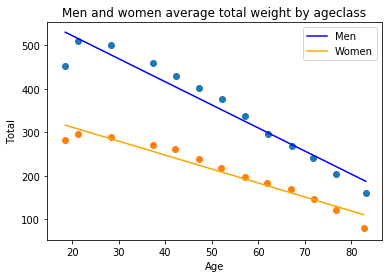

In [64]:
# Graph with average performance differences between men and 
# woman as scatter with trendline

male = df[df['Sex']=='M'].dropna()
female = df[df['Sex']=='F'].dropna()
groupM = male.groupby('AgeClass').mean()
groupF = female.groupby('AgeClass').mean()
maleTot = groupM['TotalKg']
femaleTot = groupF['TotalKg']
maleAge = groupM['Age']
femaleAge = groupF['Age']

x1 = maleAge.to_numpy()
y1 = maleTot.to_numpy()
x2 = femaleAge.to_numpy()
y2 = femaleTot.to_numpy()

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.xlabel('Age')
plt.ylabel('Total')

z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),'blue')

z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),'orange')

plt.legend(['Men','Women'])
plt.title('Men and women average total weight by ageclass')
plt.show()


<BarContainer object of 2 artists>

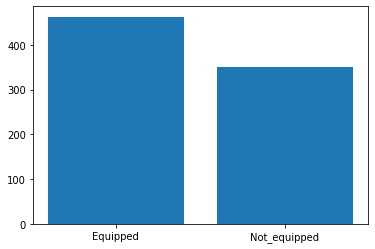

In [29]:
# Categorical plotting of average total onequiped lift 
# vs. non-equipped lift

types = ['Equipped','Not_equipped']

eq = df[df['Equipment']!='Raw']['TotalKg'].mean()
noEq = df[df['Equipment']=='Raw']['TotalKg'].mean()

values = [eq,noEq]

plt.bar(types,values)

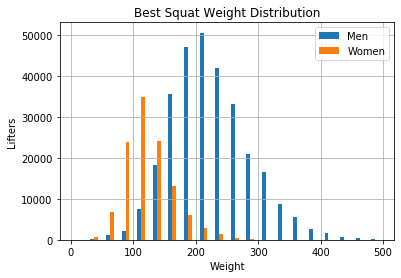

In [5]:
# Histogram with the different lifts consisting of kg 
# intervals displaying the amount of lifters within each 
# interval, maybe separating between men and women

data = df[(df['Sex']=='M')&(df['Best3SquatKg']>0)]['Best3SquatKg'].dropna()
data2 = df[(df['Sex']=='F')&(df['Best3SquatKg']>0)]['Best3SquatKg'].dropna()
plt.hist([data,data2], range=[0,500], bins=20, rwidth=0.5, label=['Men','Women'])
plt.legend(['Men','Women'])
plt.xlabel('Weight')
plt.ylabel('Lifters')
plt.title('Best Squat Weight Distribution')
plt.grid(True)